In [6]:
import numpy as np

RNG = np.random.default_rng(seed=0)

def sigmoid(a):
    return 1/(1+np.exp(-a))

def f(x):
    return x[:, 0]**2 + np.log(abs(x[:, 1])) + 2*x[:, 2] + np.sin(x[:, 3]) - 1

n = 100
x = RNG.multivariate_normal(np.zeros(shape=(4, )), np.eye(4), size=n)
x = np.column_stack((np.ones(dtype=float, shape=n), x))
y = RNG.binomial(n=1, p=sigmoid(f(x)))
y

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [13]:
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

bs = BSplines(x, df=[10, 10, 10, 10, 10], degree=[3, 3, 3, 3, 3])

gam = GLMGam(y, x, smoother=bs)
res = gam.fit()

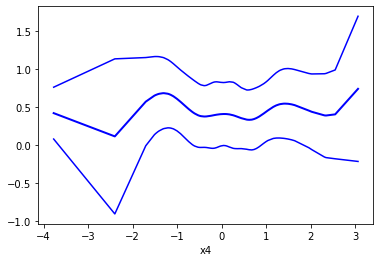

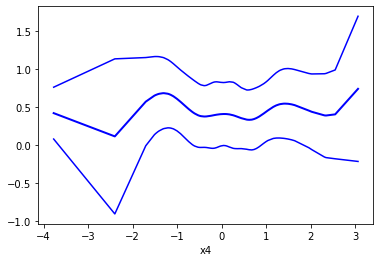

In [19]:
res.predict(x)